In [60]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/')
from cardiac import templates
from cardiac import fields
from cardiac import spectrum

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [61]:
import os
# Hack to get Latex working on Perlmutter. Due to Joe de Rose
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

plt.style.use('/global/u1/a/ab2368/plt_styles/JCAP_paper_twothirdssize.mplstyle')
plots_dir = '/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/paper/63ffea69c50c290da6f23d0e/plots/'

In [ ]:
nside = 128
alpha = -2
lmax_pert = 100

n_samples_of_chi = 2**8 # (a power of 2). Number of samples in chi

## Galaxy clustering auto spectrum

In [77]:
my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=3)

bvec = [0.786, 0.583, -0.406, -0.512, 1755]

zshift_temp_1 = templates.MockTemplate(0.006, nside, -2, 100)
zshift_temp_2 = zshift_temp_1 #templates.MockTemplate(0.006, nside, -2, 100)


/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/cardiac/templates.py:33: RuntimeWarning: divide by zero encountered in power
  pert_cls = np.arange(lmax_pert, dtype=float)**alpha


In [78]:
gal_delta1 = fields.GalDelta(my_grid, 0.06, 0.59, bvec, template_zmean_shifts=zshift_temp_1)

ggcross = spectrum.Spec(gal_delta1, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 8.187795e-13
  warnings.warn(


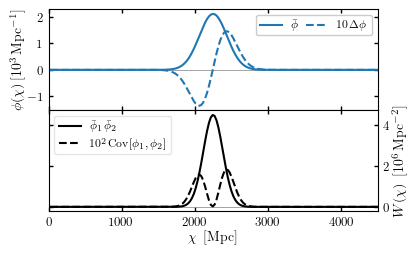

In [79]:
idx = 10

power_scaling_ax0 = 3
power_scaling_ax1 = 6

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * ggcross.field1.p_fid_array, color="C{}".format(0), ls='-', label=r'$\bar{\phi}$')

axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * 10*ggcross.field1.delta_p_maps[idx,:], color="C{}".format(0), ls='--', label=r'$10\,\Delta \phi$')


axs[1].plot(ggcross.grid.chi_array, 10**power_scaling_ax1 * ggcross.kernel(ggcross.grid.chi_array), ls='-', color='k', label=r'$\bar{\phi}_1 \, \bar{\phi}_2$')
axs[1].plot(ggcross.grid.chi_array, 10**power_scaling_ax1 * 100*ggcross.cov_at_chi, ls='--', color='k', label=r'$10^{2}\,\mathrm{Cov}[\phi_1, \phi_2]$')


axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8, loc='upper left')

axs[1].set_xlabel(r'$\chi$\, [Mpc]')
axs[1].set_xlim([0,4500])

axs[0].set_ylabel(r'$\phi(\chi)$\,[$10^{'+str(power_scaling_ax0)+'}$\,Mpc$^{-1}$]')
axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]', )
plt.savefig(plots_dir+'fig_kernel_comparison_gg_auto.pdf', bbox_inches='tight', dpi=600)

## Galaxy clustering cross spectrum

In [72]:
my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=3)

bvec = [0.786, 0.583, -0.406, -0.512, 1755]

zshift_temp_1 = templates.MockTemplate(0.006, nside, -2, 100)
zshift_temp_2 = zshift_temp_1 #templates.MockTemplate(0.006, nside, -2, 100)


/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/cardiac/templates.py:33: RuntimeWarning: divide by zero encountered in power
  pert_cls = np.arange(lmax_pert, dtype=float)**alpha


In [73]:
gal_delta1 = fields.GalDelta(my_grid, 0.06, 0.59, bvec, template_zmean_shifts=zshift_temp_1)
gal_delta2 = fields.GalDelta(my_grid, 0.06, 0.79, bvec, template_zmean_shifts=zshift_temp_1)

ggcross = spectrum.Spec(gal_delta1, gal_delta2, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 8.187988e-13
  warnings.warn(
/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 3.480070e-13
  warnings.warn(


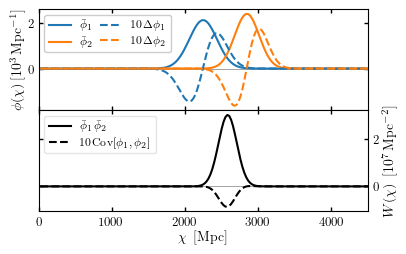

In [76]:
idx = 10

power_scaling_ax0 = 3
power_scaling_ax1 = 7

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * ggcross.field1.p_fid_array, color="C{}".format(0), ls='-', label=r'$\bar{\phi}_1$')
axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * ggcross.field2.p_fid_array, color="C{}".format(1), ls='-', label=r'$\bar{\phi}_2$')

axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * 10*ggcross.field1.delta_p_maps[idx,:], color="C{}".format(0), ls='--', label=r'$10\,\Delta \phi_1$')
axs[0].plot(ggcross.grid.chi_array, 10**power_scaling_ax0 * 10*ggcross.field2.delta_p_maps[idx,:], color="C{}".format(1), ls='--', label=r'$10\,\Delta \phi_2$')


axs[1].plot(ggcross.grid.chi_array, 10**power_scaling_ax1 * ggcross.kernel(ggcross.grid.chi_array), ls='-', color='k', label=r'$\bar{\phi}_1 \, \bar{\phi}_2$')
axs[1].plot(ggcross.grid.chi_array, 10**power_scaling_ax1 * 10*ggcross.cov_at_chi, ls='--', color='k', label=r'$10\,\mathrm{Cov}[\phi_1, \phi_2]$')


axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8, loc='upper left')

axs[1].set_xlabel(r'$\chi$\, [Mpc]')
axs[1].set_xlim([0,4500])

axs[0].set_ylabel(r'$\phi(\chi)$\,[$10^{'+str(power_scaling_ax0)+'}$\,Mpc$^{-1}$]')
axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]')
plt.savefig(plots_dir+'fig_kernel_comparison_gg.pdf', bbox_inches='tight', dpi=600)

### Cosmic shear auto-spectrum

In [116]:
my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=3)

zshift_temp_1 = templates.MockTemplate(0.006, nside, -2, 100)
zshift_temp_2 = zshift_temp_1 #templates.MockTemplate(0.006, nside, -2, 100)

/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/cardiac/templates.py:33: RuntimeWarning: divide by zero encountered in power
  pert_cls = np.arange(lmax_pert, dtype=float)**alpha


In [117]:
gal_kappa1 = fields.GalShear(my_grid, 0.2, 0.59, template_zmean_shifts=zshift_temp_1)

kkcross = spectrum.Spec(gal_kappa1, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 2.983502e-14
  warnings.warn(


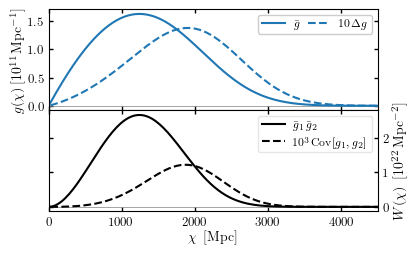

In [118]:
idx = np.argmax(zshift_temp_1.map)

power_scaling_ax0 = 11
power_scaling_ax1 = 22
cov_power_scaling = 3

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * kkcross.field1.p_fid_array, ls='-', color="C{}".format(0), label=r'$\bar{g}$')

axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * 10 * kkcross.field1.delta_p_maps[idx,:], ls='--', color="C{}".format(0), label=r'$10\,\Delta g$')

axs[1].plot(kkcross.grid.chi_array, 10**power_scaling_ax1 * kkcross.kernel(ggcross.grid.chi_array), ls='-', color='k', label=r'$\bar{g}_1\, \bar{g}_2$')
axs[1].plot(kkcross.grid.chi_array, 10**power_scaling_ax1 * 10**cov_power_scaling *kkcross.cov_at_chi, ls='--', color='k', label=r'$10^{'+str(cov_power_scaling)+'}\,\mathrm{Cov}[g_1, g_2]$')

axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8)

axs[1].set_xlabel(r'$\chi$\, [Mpc]')

axs[0].set_ylabel(r'$g(\chi)$\,[$10^{'+str(power_scaling_ax0)+'}$\,Mpc$^{-1}$]')

axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]')

axs[1].set_xlim([0,4500])
plt.savefig(plots_dir+'fig_kernel_comparison_kk_auto.pdf', bbox_inches='tight', dpi=600)

### Cosmic shear cross spectrum


In [88]:
my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=3)

zshift_temp_1 = templates.MockTemplate(0.006, nside, -2, 100)
zshift_temp_2 = zshift_temp_1 #templates.MockTemplate(0.006, nside, -2, 100)

/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/cardiac/templates.py:33: RuntimeWarning: divide by zero encountered in power
  pert_cls = np.arange(lmax_pert, dtype=float)**alpha


In [114]:
gal_kappa1 = fields.GalShear(my_grid, 0.2, 0.59, template_zmean_shifts=zshift_temp_1)
gal_kappa2 = fields.GalShear(my_grid, 0.2, 1, template_zmean_shifts=zshift_temp_1)

kkcross = spectrum.Spec(gal_kappa1, gal_kappa2, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 2.983494e-14
  warnings.warn(
/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 5.874922e-14
  warnings.warn(


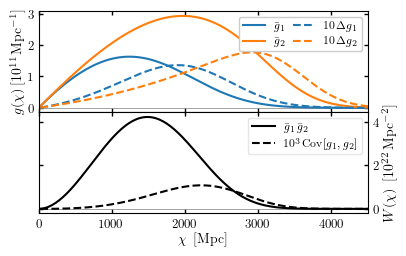

In [115]:
idx = np.argmax(zshift_temp_1.map)

power_scaling_ax0 = 11
power_scaling_ax1 = 22
cov_power_scaling = 3

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * kkcross.field1.p_fid_array, ls='-', color="C{}".format(0), label=r'$\bar{g}_1$')
axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * kkcross.field2.p_fid_array, ls='-', color="C{}".format(1), label=r'$\bar{g}_2$')

axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * 10 * kkcross.field1.delta_p_maps[idx,:], ls='--', color="C{}".format(0), label=r'$10\,\Delta g_1$')
axs[0].plot(kkcross.grid.chi_array, 10**power_scaling_ax0 * 10 * kkcross.field2.delta_p_maps[idx,:], ls='--', color="C{}".format(1), label=r'$10\,\Delta g_2$')


axs[1].plot(kkcross.grid.chi_array, 10**power_scaling_ax1 * kkcross.kernel(ggcross.grid.chi_array), ls='-', color='k', label=r'$\bar{g}_1\, \bar{g}_2$')
axs[1].plot(kkcross.grid.chi_array, 10**power_scaling_ax1 * 10**cov_power_scaling *kkcross.cov_at_chi, ls='--', color='k', label=r'$10^{'+str(cov_power_scaling)+'}\,\mathrm{Cov}[g_1, g_2]$')

axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8)

axs[1].set_xlabel(r'$\chi$\, [Mpc]')

axs[0].set_ylabel(r'$g(\chi)$\,[$10^{'+str(power_scaling_ax0)+'}$\,Mpc$^{-1}$]')

axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]')

axs[1].set_xlim([0,4500])
plt.savefig(plots_dir+'fig_kernel_comparison_kk.pdf', bbox_inches='tight', dpi=600)

## Galaxy-galaxy lensing

In [96]:
my_grid = fields.grid(nside, n_samples_of_chi, z_max_int=3)


zshift_temp_1 = templates.MockTemplate(0.006, nside, -2, 100)
zshift_temp_2 = zshift_temp_1 #templates.MockTemplate(0.006, nside, -2, 100)

/global/u1/a/ab2368/varying_dndzs/Varying_dndzs/cardiac/templates.py:33: RuntimeWarning: divide by zero encountered in power
  pert_cls = np.arange(lmax_pert, dtype=float)**alpha


In [97]:
gal_delta = fields.GalDelta(my_grid, 0.06, 0.59, bvec, template_zmean_shifts=zshift_temp_1)
gal_kappa = fields.GalShear(my_grid, 0.2, 1, template_zmean_shifts=zshift_temp_1)

ggl = spectrum.Spec(gal_delta, gal_kappa, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 8.187802e-13
  warnings.warn(
/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 5.874922e-14
  warnings.warn(


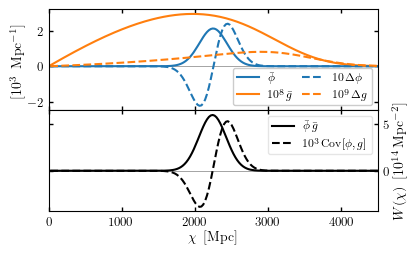

In [98]:
power_scaling_ax0 = 3
power_scaling_ax1 = 14
cov_power_scaling = 3
g_power_scaling = 8

idx = 101

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * ggl.field1.p_fid_array, ls='-', color="C{}".format(0), label=r'$\bar{\phi}$')
axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10**g_power_scaling * ggl.field2.p_fid_array, ls='-', color="C{}".format(1), label=r'$10^{'+str(g_power_scaling)+r'}\,\bar{g}$')

axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10*ggl.field1.delta_p_maps[idx,:], ls='--', color="C{}".format(0), label=r'$10\,\Delta \phi$')
axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10**(g_power_scaling+1) * ggl.field2.delta_p_maps[idx,:], ls='--', color="C{}".format(1), label=r'$10^{'+str(g_power_scaling+1)+'}\,\Delta g$')


axs[1].plot(ggl.grid.chi_array, 10**power_scaling_ax1 * ggl.kernel(ggl.grid.chi_array), ls='-', color='k', label=r'$\bar{\phi} \,\bar{g}$')
axs[1].plot(ggl.grid.chi_array, 10**power_scaling_ax1 * 10**cov_power_scaling * ggl.cov_at_chi, ls='--', color='k', label=r'$10^{'+str(cov_power_scaling)+'}\,\mathrm{Cov}[\phi, g]$')


axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8)

axs[1].set_xlabel(r'$\chi$\, [Mpc]')

axs[0].set_ylabel(r'[$10^{'+str(power_scaling_ax0)+'}$ \,Mpc$^{-1}$]')
axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]')

axs[1].set_xlim([0,4500])
plt.savefig(plots_dir+'fig_kernel_comparison_ggl_sourcelensfar.pdf', bbox_inches='tight', dpi=600)

In [99]:
gal_delta = fields.GalDelta(my_grid, 0.06, 0.59, bvec, template_zmean_shifts=zshift_temp_1)
gal_kappa = fields.GalShear(my_grid, 0.06, 0.59, template_zmean_shifts=zshift_temp_1)

ggl = spectrum.Spec(gal_delta, gal_kappa, get_cls=False, save=False)

/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (3001) exceeded. Latest difference = 8.187802e-13
  warnings.warn(


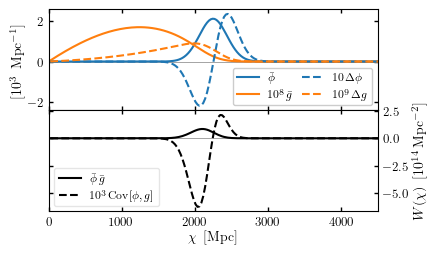

In [100]:
power_scaling_ax1 = 14
cov_power_scaling = 3

idx = 100

fig, axs = plt.subplots(2, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')
axs[1].yaxis.set_label_position("right")

axs[0].axhline(0, color='gray', lw=0.5)
axs[1].axhline(0, color='gray', lw=0.5)

axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * ggl.field1.p_fid_array, ls='-', color="C{}".format(0), label=r'$\bar{\phi}$')
axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10**g_power_scaling * ggl.field2.p_fid_array, ls='-', color="C{}".format(1), label=r'$10^{'+str(g_power_scaling)+r'}\,\bar{g}$')

axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10*ggl.field1.delta_p_maps[idx,:], ls='--', color="C{}".format(0), label=r'$10\,\Delta \phi$')
axs[0].plot(ggl.grid.chi_array, 10**power_scaling_ax0 * 10**(g_power_scaling+1) * ggl.field2.delta_p_maps[idx,:], ls='--', color="C{}".format(1), label=r'$10^{'+str(g_power_scaling+1)+'}\,\Delta g$')


axs[1].plot(ggl.grid.chi_array, 10**power_scaling_ax1 * ggl.kernel(ggl.grid.chi_array), ls='-', color='k', label=r'$\bar{\phi}\, \bar{g}$')
axs[1].plot(ggl.grid.chi_array, 10**power_scaling_ax1 * 10**cov_power_scaling * ggl.cov_at_chi, ls='--', color='k', label=r'$10^{'+str(cov_power_scaling)+'}\,\mathrm{Cov}[\phi, g]$')


axs[0].legend(ncol=2, frameon=True, framealpha=1, columnspacing=0.7, fontsize=8)
axs[1].legend(frameon=True, fontsize=8)

axs[1].set_xlabel(r'$\chi$\, [Mpc]')

axs[0].set_ylabel(r'[$10^{'+str(power_scaling_ax0)+'}$ \,Mpc$^{-1}$]')
axs[1].set_ylabel(r'$W(\chi)$\, [$10^{'+str(power_scaling_ax1)+r'}$\,Mpc$^{-2}$]')


axs[1].set_xlim([0,4500])
plt.savefig(plots_dir+'fig_kernel_comparison_ggl_sourcelensclose.pdf', bbox_inches='tight', dpi=600)

This hinges really on the width of the source galaxy sample